## 데이터 수집

- https://kadx.co.kr/opmk/frn/pmumkproductDetail/PMU_79c6f1a4-56dd-492e-ad67-c5acba0304d2/5# 에서 무료 제공
- csv파일 3개 다운로드

## 데이터 전처리

### json file 관련 함수 

- save_json : 데이터를 json으로 저장
- load_json : json 파일 불러오기
- 기본 경로 현재 폴더인 'data'로 지정 해둠.

In [2]:
import os
import json

def save_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

def load_json(filename):
    if not os.path.exists(filename):
        return None
    with open(filename, 'r', encoding='utf-8') as f:
        return json.load(f)

### 인코딩 
- 인코딩 utf-8

In [ ]:
import pandas as pd
import chardet

# 기존 파일 리스트
original_paths = [
    "TB_RECIPE_SEARCH-220701.csv",
    "TB_RECIPE_SEARCH-20231130.csv",
    "TB_RECIPE_SEARCH_241226.csv"
]

def encoding(filepath, num_bytes=10000):
    # 인코딩 감지
    with open(filepath, 'rb') as f:
        raw = f.read(num_bytes)
    result = chardet.detect(raw)
    return result['encoding']

# 인코딩 변환 및 덮어쓰기 저장
for path in original_paths:
    try:
        detected_encoding = encoding(path)
        print(f"[감지됨] {path} → 인코딩: {detected_encoding}")

        # 감지된 인코딩으로 열기
        with open(path, 'r', encoding=detected_encoding, errors='replace') as f:
            df = pd.read_csv(f)

        # UTF-8 인코딩 덮어쓰기 저장
        df.to_csv(path, index=False, encoding='utf-8-sig')

        print(f"[저장 완료] {path} → UTF-8 인코딩 완료")

    except Exception as e:
        print(f"[실패] {path}: {e}")

[감지됨] TB_RECIPE_SEARCH_241226.csv → 인코딩: utf-8
[저장 완료] TB_RECIPE_SEARCH_241226.csv → UTF-8 인코딩 완료


### 파일 통합
- 3개 파일 통합
- .json로 변환
- github push 용량 제한으로 다시 4분할

In [1]:
import pandas as pd
import numpy as np

# 파일 리스트
csv_files = [
    "TB_RECIPE_SEARCH-220701.csv",
    "TB_RECIPE_SEARCH-20231130.csv",
    "TB_RECIPE_SEARCH_241226.csv"
]

# 하나의 DataFrame으로 결합
df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file, encoding='utf-8-sig')
        df_list.append(df)
        print(f"[읽기 완료] {file}")
    except Exception as e:
        print(f"[오류] {file}: {e}")

# DataFrame 병합
merged_df = pd.concat(df_list, ignore_index=True)

# 4분할 저장
chunks = np.array_split(merged_df, 4) 
for i, chunk in enumerate(chunks, 1):
    output_file = f"recipe_mangae_{i}.json"
    chunk.to_json(output_file, orient='records', force_ascii=False, indent=2)
    print(f"[저장 완료] {output_file} → {len(chunk)}개 레시피")

[읽기 완료] TB_RECIPE_SEARCH-220701.csv
[읽기 완료] TB_RECIPE_SEARCH-20231130.csv
[읽기 완료] TB_RECIPE_SEARCH_241226.csv


c:\Users\User\miniconda3\envs\boracay\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[저장 완료] recipe_mangae_1.json → 84146개 레시피
[저장 완료] recipe_mangae_2.json → 84146개 레시피
[저장 완료] recipe_mangae_3.json → 84146개 레시피
[저장 완료] recipe_mangae_4.json → 84145개 레시피


### key 값 전처리

- 기존 영어 -> 의미에 맞는 이름으로 변환
- 사이트 제공 참고

| index | pk    | type         | nameEn             | nameKo(제공)        | 최종 이름        |
| ----- | ----- | ------------ | ------------------ | ------------------ | --------------- |
| 0     | Y     | NUMBER(40)   | RCP_SNO            | "레시피일련번호"     |"recipe_id"      |
| 1     | N     | VARCHAR(200) | RCP_TTL            | "레시피제목"         |"recipe_title"   | 
| 2     | N     | VARCHAR(40)  | CKG_NM             | "요리명"            |"dish_name"      |
| 3     | N     | VARCHAR(32)  | RGTR_ID            | "등록자ID"          |"author_id"     | 
| 4     | N     | VARCHAR(64)  | RGTR_NM            | "등록자명"          |"author_name"    |
| 5     | N     | NUMBER(11)   | INQ_CNT            | "조회수"            |"view_count"    |
| 6     | N     | NUMBER(11)   | RCMM_CNT	        | "추천수"            |"like_count"    |
| 7     | N     | NUMBER(11)   | SRAP_CNT           | "스크랩수"          |"bookmark_count" |
| 8     | N     | VARCHAR(200) | CKG_MTH_ACTO_NM    | "요리방법별명"       |"cooking_method"    |
| 9     | N     | VARCHAR(200) | CKG_STA_ACTO_NM    | "요리상황별명"       |"cooking_situation"    |
| 10    | N     | VARCHAR(200) | CKG_MTRL_ACTO_NM   | "요리재료별명"       |"main_ingredient"    |
| 11    | N     | VARCHAR(200) | CKG_KND_ACTO_NM    | "요리종류별명"       |"dish_type"    |
| 12    | N     | VARCHAR(4000)| CKG_IPDC           | "요리소개"          |"description"    |
| 13    | N     | VARCHAR(4000)| CKG_MTRL_CN        | "요리재료내용"       |"ingredients"    |
| 14    | N     | VARCHAR(200) | CKG_INBUN_NM       | "요리인분명"         |"servings"    |
| 15    | N     | VARCHAR(200) | CKG_DODF_NM        | "요리난이도명"       |"difficulty"    |
| 16    | N     | VARCHAR(200) | CKG_TIME_NM        | "요리시간명"         |"cooking_time"    |
| 17    | N     | CHAR(14)	   | FIRST_REG_DT       | "최초등록일시"       |"created_at"    |
| 18    | N     | VARCHAR(200) | RCP_IMG_URL        | *미제공             |"image_url"    |

In [2]:
import logging

# 로거 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# 바꿀 key 매핑
key_map = {
    "RCP_SNO": "recipe_id",
    "RCP_TTL": "recipe_title",
    "CKG_NM": "dish_name",
    "RGTR_ID": "author_id",
    "RGTR_NM": "author_name",
    "INQ_CNT": "view_count",
    "RCMM_CNT": "like_count",
    "SRAP_CNT": "bookmark_count",
    "CKG_MTH_ACTO_NM": "cooking_method",
    "CKG_STA_ACTO_NM": "cooking_situation",
    "CKG_MTRL_ACTO_NM": "main_ingredient",
    "CKG_KND_ACTO_NM": "dish_type",
    "CKG_IPDC": "description",
    "CKG_MTRL_CN": "ingredients",
    "CKG_INBUN_NM": "servings",
    "CKG_DODF_NM": "difficulty",
    "CKG_TIME_NM": "cooking_time",
    "FIRST_REG_DT": "created_at",
    "RCP_IMG_URL": "image_url"
}

for i in range(1,5):
    data=load_json(f"recipe_mangae_{i}.json")
    converted_data=[{key_map.get(k, k): v for k, v in recipe.items()} for recipe in data]
    save_json(converted_data,f"recipe_mangae_{i}.json")
    logger.info(f"recipe_mangae_{i}.json - key 변환 완료")

INFO:__main__:recipe_mangae_1.json - key 변환 완료
INFO:__main__:recipe_mangae_2.json - key 변환 완료
INFO:__main__:recipe_mangae_3.json - key 변환 완료
INFO:__main__:recipe_mangae_4.json - key 변환 완료


- 사용되지 않을 것으로 판단한 key 삭제 
- 등록자 관련 정보 삭제. 레시피를 누가 작성했냐는 사용될 일 없음 -> "author_id", "author_name"
- 주재료 삭제. 재료 안에도 담겨있는 경우(재료 안에서 검색하면 됨) 혹은 '가공식품류', '채소류' 등의 의미 없는 정보. -> "main_ingredient"
- 요리 방법 삭제. '끓이기', '굽기' 등의 간단한 요리 방법은 레시피에 제공할 필요도 없고, ai 검색에도 필요 없을 것으로 판단. -> "cooking_method"

In [ ]:
import os
import json
import logging

# 로깅 설정
logging.basicConfig(
    level=logging.INFO,
    format='[%(asctime)s] %(levelname)s - %(message)s'
)

# 삭제할 키 목록
keys_to_delete = ["author_id", "author_name", "main_ingredient", "cooking_method"]

for i in range(1,5):
    data = load_json(f"recipe_mangae_{i}.json")

    for recipe in data:
        for key in keys_to_delete:
                del recipe[key]

    save_json(data,f"recipe_mangae_{i}.json")
logging.info(f"key 삭제 완료")

[2025-07-06 17:48:51,532] INFO - key 삭제 완료


### 추천 score
- "view_count", "bookmark_count", "like_count" -> 3개의 key를 하나의 "score" key로 추출.
- 같음 음식에 대한 레시피들 중 선택할 때 근거로 활용.
- score를 만들기 위한 데이터 분석 후 함수 만들어 적용.

- 3개의 값 산점도 시각화 -> 대략적으로 선형관계인지 파악
- 상관계수 확인 -> 서로의 상관관게를 파악해 최종 점수에 어떻게 적용할지 결정
- 상위 샘플 비교 -> 실제 순위가 많이 겹치는지 확인

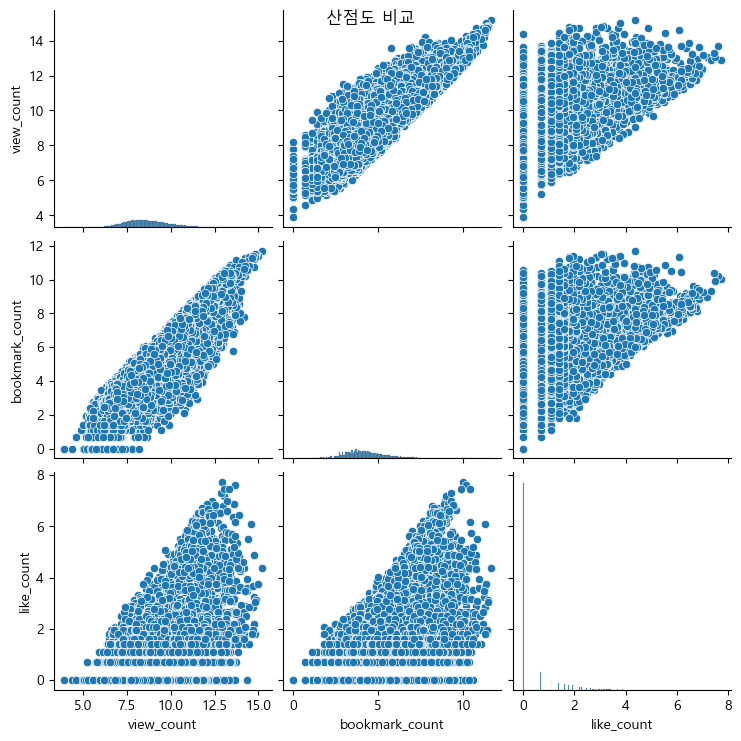

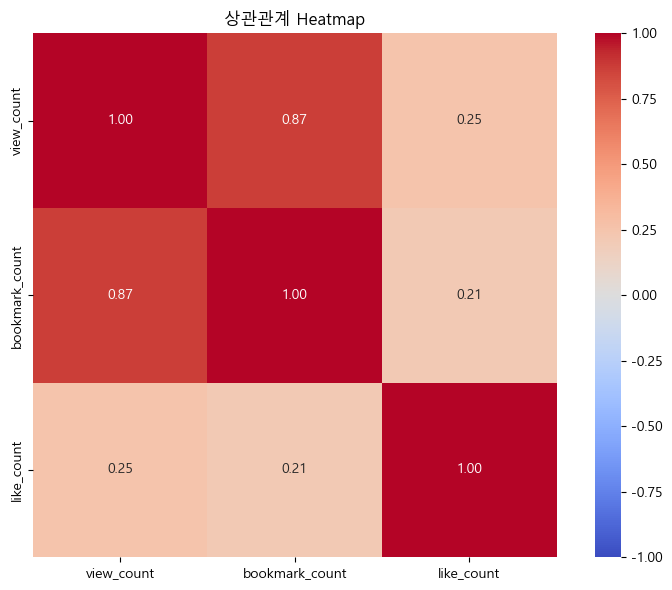

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드
df = pd.read_json("recipe_mangae_3.json")

# 산점도 시각화
df_log = df[["view_count", "bookmark_count", "like_count"]].copy()
df_log = np.log1p(df_log)  # log 변환

sns.pairplot(df_log)
plt.suptitle("산점도 비교")
plt.show()

# 상관계수 확인 - Pearson
corr = df[["view_count", "bookmark_count", "like_count"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("상관관계 Heatmap")
plt.tight_layout()
plt.show()

- 데이터가 어떤 값들로 이루어져있는지 분석.
- 조회수와 다른 값들의 분산이 심하게 차이남 -> log 정규화 필요.
- 좋아요수는 단순 클릭이 아니라 레시피가 마음에 든다는 의미가 담긴 정보로 데이터의 질이 괜찮은가를 평가할 지표로 사용됨. 가중치가 있어야함.
- 좋아요수 의 75%가 0,1 로 이루어져있음 -> score feature로 넣어서 가중치를 키우면 정보의 변형이 심할 우려 있음.
- 좋아요수를 제외하고 조회수, 북마크수로 score를 책정하고 거기서 순위대로 뽑힌 레시피들 중에서 좋아요수가 가장 높은 것을 대표 레시피로 뽑는 방식 적용.

[요약 통계]
         view_count  bookmark_count    like_count
count  8.414600e+04    84146.000000  84146.000000
mean   1.709682e+04      377.450847      3.976814
std    6.240578e+04     2125.098878     27.834016
min    4.800000e+01        0.000000      0.000000
25%    2.397000e+03       29.000000      0.000000
50%    5.235500e+03       64.000000      0.000000
75%    1.306900e+04      171.000000      1.000000
max    3.939199e+06   120446.000000   2270.000000


<Figure size 1000x500 with 0 Axes>

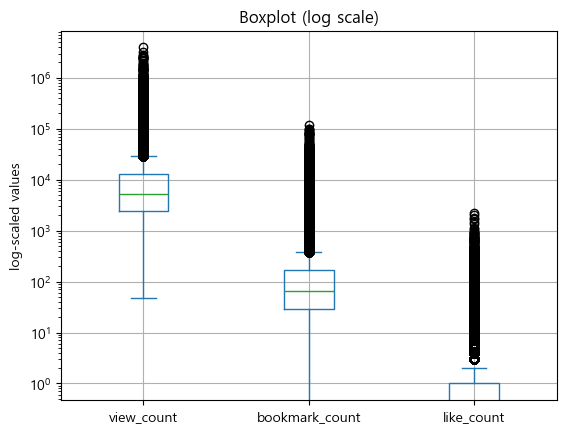

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 불러오기
df = pd.read_json("recipe_mangae_3.json")

# 분석 대상 컬럼
cols = ["view_count", "bookmark_count", "like_count"]

# describe
print("[요약 통계]")
print(df[cols].describe())

# Boxplot으로 분포 비교
plt.figure(figsize=(10, 5))
df[cols].plot(kind='box', logy=True, title="Boxplot (log scale)")
plt.ylabel("log-scaled values")
plt.grid(True)
plt.show()


- 좋아요수는 조회수/북마크수와 낮은 상관관계.
- 조회수와 북마크수는 매우 높은 상관관계 -> 스피어만,Mutual Information 추가로 확인 후 어떻게 처리해야할지 파악
- 수치적으로 강한 상관관계, 선형 관계 + 북마크수의 분산비율이 압도적으로 작음으로 영향 미미 -> 북마크수는 조회수와 중복되는 지표
- 그러나 두 행동의 의미는 다름. 조회수는 단순 클릭으로 나타나는 값이지만 북마크수는 저장을 하고 볼거라는 의도를 담고 있는 행동 -> 0.2의 가중치로 약하게 추가

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import spearmanr

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드
df = pd.read_json("recipe_mangae_3.json")
df = df[["recipe_title", "view_count", "bookmark_count"]].dropna()

# 상관계수 - Spearman
spearman_corr, _ = spearmanr(df["view_count"], df["bookmark_count"])
print(f"순위 상관계수 (Spearman): {spearman_corr:.5f}")

# Mutual Information
X = df[["view_count"]]
y = df["bookmark_count"]
mi = mutual_info_regression(X, y, discrete_features=False)
print(f"Mutual Information: {mi[0]:.5f}")

# 분산 비율
var_view = df["view_count"].var()
var_bookmark = df["bookmark_count"].var()
var_ratio = var_bookmark / var_view
print(f"분산 비율 (bookmark/view): {var_ratio:.5f}")

# Top 50 순위 비교
df["score_view"] = df["view_count"]
df["score_bookmark"] = df["bookmark_count"]

top_view_titles = set(df.sort_values("score_view", ascending=False).head(50)["recipe_title"])
top_bookmark_titles = set(df.sort_values("score_bookmark", ascending=False).head(50)["recipe_title"])

overlap_count = len(top_view_titles & top_bookmark_titles)
print(f"Top50 중 겹치는 수 : {overlap_count}/50")

순위 상관계수 (Spearman): 0.82916
Mutual Information: 0.69327
분산 비율 (bookmark/view): 0.00116
Top50 중 겹치는 수 : 36/50


In [ ]:
import pandas as pd
import numpy as np

for i in range(1,5):
    data= load_json(f"recipe_mangae_{i}.json")

    # DataFrame으로 변환
    df = pd.DataFrame(data)

    # 결측값 처리
    df["view_count"] = df["view_count"].fillna(0)
    df["bookmark_count"] = df["bookmark_count"].fillna(0)

    # score 계산
    df["score"] = np.log1p(df["view_count"]) + 0.2 * np.log1p(df["bookmark_count"])
    df["score"] = df["score"].round(5)

    # 기존 컬럼 제거
    df = df.drop(columns=["view_count", "bookmark_count"])

    # JSON 저장
    save_json(df.to_dict(orient="records"),f"recipe_mangae_{i}.json")

print(f"score 생성 완료")

score 생성 완료


### 데이터 삭제
- 중복 데이터 삭제 -> id가 같은 것은 중복 데이터. 같은 레시피 중 score이 더 높은 것이 나중에 업데이트된 정보이므로 이것을 선택하고 나머지 삭제.
- 같은 음식에 대한 레시피가 여러개 존재. 하지만 많이 필요하지 않음. 총 3개씩만 남기고 나머지 삭제.
- 선정 기준 : 1) score 기준으로 상위 10개 정렬 -> 2) 그 10개 중에서는 like_count가 높은순으로 선택
- 용량 때문에 4개로 나누어져 있던 파일 하나로 통합. / 기존 데이터 삭제.

In [4]:
from collections import defaultdict

# 파일 합치기
data = []
for i in range(1, 5):
    data.extend(load_json(f"recipe_mangae_{i}.json"))

# recipe_id 중복 제거 (score 높은 것 유지)
all_data = {}
for recipe in data:
    rid = recipe.get("recipe_id")
    if rid not in all_data or recipe.get("score", 0) > all_data[rid].get("score", 0):
        all_data[rid] = recipe

clean_data = list(all_data.values())
print(f"중복 제거 완료 {len(data)}개 -> {len(clean_data)}개")

# dish_name으로 그룹화
grouped = defaultdict(list)
for recipe in clean_data:
    dish = recipe.get("dish_name")
    if dish and "score" in recipe and "like_count" in recipe:
        grouped[dish].append(recipe)

# 각 음식별로 최대 10개(score 기준) → 그 중 상위 3개(like_count 기준)
final_recipes = []
for dish, recipes in grouped.items():
    top_10 = sorted(recipes, key=lambda x: x["score"], reverse=True)[:10]
    top_3 = sorted(top_10, key=lambda x: x["like_count"], reverse=True)[:3]
    final_recipes.extend(top_3)

# like_count key 제거
for recipe in final_recipes:
    recipe.pop("like_count", None)

# 저장
save_json(final_recipes, "recipe_mangae.json")
print(f"최종 선택 레시피 저장 - {len(final_recipes)}개")


중복 제거 완료 326141개 -> 208440개
최종 선택 레시피 저장 - 83069개
